Импортируем библиотеки и загружаем данные

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

<!-- Фун-ия для перевода единиц измерения в имперскую систему -->

Функция для перевода единиц измерения в имперскую систему

In [145]:
def unitConvertion():
    if unitTrans == "metric":
        unit = 1
    elif unitTrans == "imperial":
        unit = 1/25.4
    return unit

In [146]:
def anglePhi():
    phi = np.arrange(0, 90*np.pi/180, 5*np.pi/180)
    for phiVal in phi:
        g1 = (1-np.sin(phi))**3
        g2 = 1 + (0.08 + 0.15 * (1)**2)*(1-np.cos(phi))**3
        f_phi = ((1)**2 * np.cos(phi)**2 + np.sin(phi)**2)**(1/4)
        E_k = (1 + 1.464 * (1)**1.65)**(1/2)
        return (((M1 + M2*(1)**2 + M3*(1)**4) * g1 * g2 * f_phi) / E_k) * 1.122
    if angle == "deg":
        phi = np.deg2rad(90)
    elif angle == "rad":
        phi = np.pi/2
    return phi

Далее мы создаем функцию, которая будет принимать на вход данные длины трещины и возвращать значения геометрического поправочного коэффициента. 

In [147]:
def betta(a):
    if choice_geom == 1:
        return np.sqrt(((2*b)/(np.pi*a)*np.tan((np.pi*a)/(2*b))))*((0.752+2.02*(a/b)+0.37*(1-np.sin((np.pi*a)/(2*b)))**3)/np.cos((np.pi*a)/(2*b))) * 1.122

    elif choice_geom == 2:
        alpha = ((a) + Rad) / b
        alpha_star = (np.pi / 2) * alpha
        delta = Rad / Rad
        gamma = Rad / b
        beta = (alpha - gamma) / (1 - gamma)
        g = 0.13 * ((2 / np.pi * np.arctan(delta)) ** 2)
        epsilon = alpha * (2 / np.pi * np.arctan(0.6 * (delta ** (1/3))))
        phi = (np.pi * (np.sqrt(( 1 / alpha_star) * (np.tan(alpha_star) + g * 2 * np.sin(alpha_star) * np.cos(alpha_star))) * (1 + epsilon ** 2 * (2 - epsilon ** 2) / (1 - epsilon))) - np.sqrt(1 + 2 * g))/(np.pi - 1)
        beta_star = (gamma * delta) / (gamma * (2 * delta - 1) + 1)
        xi = 1 + (2 / np.pi * np.arctan(1.5 * np.sqrt(delta)))
        P = np.log10((xi ** (-3/2))) / np.log10(beta_star)
        psi = (3 * (beta ** ((2/3)*P)) - 2 * np.sqrt(xi) * beta ** (P)) * xi
        return psi * phi
    elif choice_geom == 3:
        M1 = 1.13 - 0.09 * a/a
        M2 = -0.54 + 0.89 * (0.2 + a/a)**(-1)
        M3 = 0.5 - (0.65 + a/a)**(-1) + 14 * (1 - a/a)**24
        g1 = 1 + (0.1 + 0.35 * (a / t)**2)*(1-np.sin(phi))**2
        g3 = (1 + 0.04 * a/a) * (1 + 0.1 * (1 - np.cos(phi))**2)*(0.8 + 0.2 * (a / t)**(1/4))
        f_phi = ((a/a)**2 * ((1+np.cos(2*phi))/2) + ((1 - np.cos(2*phi))/2))**(1/4)
        E_k = (1 + 1.464 * (a/a)**1.65)**(1/2)
        f_w = ((1/np.cos((np.pi*Rad)/(2*W))) * (1/np.cos(((np.pi*(2*Rad + n_crack * a))/(4*(W-a)+2*n_crack*a)) * (a/t)**(1/2))))**(1/2)
        L = (1 + (a / Rad) * np.cos(0.85 * phi))**(-1)
        g2 = (1 - 0.15*L + 3.46*L**2 - 4.47*L**3 + 3.52*L**4) * (1 + 0.13*L**2)**(-1)
        return ((M1 + M2*(a/t)**2 + M3*(a/t)**4) * g1 * g2 * g3 * f_phi * f_w) / E_k 
    elif choice_geom == 4:
        phi = 0.58
        M1 = 1.08 - 0.03 * a/a
        M2 = -0.44 + 1.06 / (0.3 + a/a)
        M3 = -0.5 - 0.25*(a/a) + 14.8 * (1 - a/a)**15
        g1 = 1 + (0.08 + 0.4 * (a / t)**2)*(1-np.sin(phi))**3
        g2 = 1 + (0.08 + 0.15 * (a / t)**2)*(1-np.cos(phi))**3
        # f_phi = ((a/a)**2 * ((1+np.cos(2*phi))/2) + ((1-np.cos(2*phi))/2))**(1/4)
        f_phi = ((a/a)**2 * np.cos(phi)**2 + np.sin(phi)**2)**(1/4)
        E_k = (1 + 1.464 * (a/a)**1.65)**(1/2)
        return (((M1 + M2*(a/t)**2 + M3*(a/t)**4) * g1 * g2 * f_phi) / E_k) 

Геометрический коэффициент для боковой трещины:

$$
\beta(a) = \sqrt{\left(\frac{2b}{\pi a}\right) \cdot \tan\left(\frac{\pi a}{2b}\right)} \cdot \left(\frac{0.752 + 2.02 \cdot \left(\frac{a}{b}\right) + 0.37 \cdot \left(1 - \sin\left(\frac{\pi a}{2b}\right)\right)^3}{\cos\left(\frac{\pi a}{2b}\right)}\right)
$$


Геометрический коэффициент для круговой трещины:

$$
\begin{align*}
\beta(a) &= \psi \cdot \phi \\
\psi &= \left(3 \cdot \beta^{(2/3)P} - 2 \cdot \sqrt{\xi} \cdot \beta^P\right) \cdot \xi \\
\phi &= \frac{\pi \cdot \sqrt{\frac{1}{\alpha^*} \cdot \left(\tan(\alpha^*) + g \cdot 2 \cdot \sin(\alpha^*) \cdot \cos(\alpha^*)\right)} \cdot \left(1 + \epsilon^2 \cdot \frac{2 - \epsilon^2}{1 - \epsilon}\right) - \sqrt{1 + 2g}}{\pi - 1} \\
\beta^* &= \frac{\gamma \cdot \delta}{\gamma \cdot (2 \cdot \delta - 1) + 1} \\
\xi &= 1 + \frac{2}{\pi} \cdot \arctan\left(1.5 \cdot \sqrt{\delta}\right) \\
P &= \frac{\log_{10}\left(\xi^{-3/2}\right)}{\log_{10}(\beta^*)} \\
\alpha &= \frac{a + \text{Rad}}{b} \\
\alpha^* &= \frac{\pi}{2} \cdot \alpha \\
\delta &= \frac{\text{Rad}}{\text{Rad}} \\
\gamma &= \frac{\text{Rad}}{b} \\
\beta &= \frac{\alpha - \gamma}{1 - \gamma} \\
g &= 0.13 \cdot \left(\frac{2}{\pi} \cdot \arctan(\delta)\right)^2 \\
\epsilon &= \alpha \cdot \frac{2}{\pi} \cdot \arctan\left(0.6 \cdot \delta^{1/3}\right)
\end{align*}
$$


Геометрический коэффициент для эллиптической трещины в отверстии:

$$
\beta(a) = \frac{{(M1 + M2 \cdot \left(\frac{a}{t}\right)^2 + M3 \cdot \left(\frac{a}{t}\right)^4) \cdot g1 \cdot g2 \cdot g3 \cdot f_{\phi} \cdot f_w}}{{E_k}}
$$


$$
M_1 = 1.13 - 0.09 \cdot \frac{a}{a}
$$

$$
M_2 = -0.54 + 0.89 \cdot (0.2 + \frac{{a}}{{a}})^{-1} \\\\
$$

$$
M_3 = 0.5 - (0.65 + \frac{{a}}{{a}})^{-1} + 14 \cdot (1 - \frac{{a}}{{a}})^{24} \\\\
$$

$$
g_1 = 1 + (0.1 + 0.35 \cdot (a / t)^2) \cdot (1-\sin(\phi))^2 \\\\
$$

$$
g_3 = (1 + 0.04 \cdot \frac{{a}}{{a}}) \cdot (1 + 0.1 \cdot (1 - \cos(\phi))^2) \cdot (0.8 + 0.2 \cdot (a / t)^{1/4}) \\\\
$$

$$
f_\phi = (\frac{{a}}{{a}}^2 \cdot (\frac{{1+\cos(2\phi)}}{{2}}) + (\frac{{1 - \cos(2\phi)}}{{2}}))^{1/4} \\\\
$$

$$
E_k = (1 + 1.464 \cdot (\frac{{a}}{{a}})^{1.65})^{1/2} \\\\
$$

$$
f_w = (\frac{{1}}{{\cos((\pi \cdot \text{{Rad}})/(2W))}} \cdot \frac{{1}}{\cos((\pi \cdot (2 \cdot \text{{Rad}} + n\_crack\cdot a))/(4 \cdot (W-a) + 2 \cdot n\_crack \cdot a)) \cdot (a/t)^{1/2}})^{1/2} \\\\
$$

$$
L = (1 + \frac{{a}}{{\text{{Rad}}}} \cdot \cos(0.85 \cdot \phi))^{-1} \\\\
$$

$$
g_2 = (1 - 0.15 \cdot L + 3.46 \cdot L^2 - 4.47 \cdot L^3 + 3.52 \cdot L^4) \cdot (1 + 0.13 \cdot L^2)^{-1} \\\\
$$

Далее определяем ф-ию, которая будет определять уравнение скорости роста трещины.

In [148]:
def equation(a):
    if choice_eq == 1:
        Kth = (K0*(np.sqrt((a/(a+0.0385)))))/(((1-f)/((1-A0)*(1-R)))**(1+C_th*R))
        # Kth = K0*4/np.pi*np.arctan(1-R)  
        # Kth = K0
        nasgro = (1-((Smax * betta(a) * np.sqrt(np.pi*a))/(Kc)))**q/((C*(U*((1-R)*Smax * (betta(a)) * np.sqrt(np.pi*a)))**n)*((1-(Kth/((1-R) * Smax * betta(a) * np.sqrt(np.pi*a))))**p))
        print("deltaK = ", Smax * (betta(a)) * np.sqrt(np.pi*a), "Kth = ", Kth, "Kc = ", Kc, "Betta(A)=", betta(a), "a =", a)
        return nasgro
    elif choice_eq == 2:
        paris = 1/(C_par*((1-R)**(m_par-1) * Smax_par * (betta(a)) * (np.sqrt(np.pi*a)))**n_par)
        return paris
    elif choice_eq == 3:
        Kth = (K0*(np.sqrt((a/(a+1.91)))))/((1-fl)/((1-A0)*(1-R)))**(1+C_th*R)                                                                
        nasgro = ((1-((Smax * (betta(a)) * np.sqrt(np.pi*a))/Kc))**q)/((C*(U*(Smax * (betta(a)) * np.sqrt(np.pi*a)))**n)*(((1-(Kth/(Smax * (betta(a)) * np.sqrt(np.pi*a))))**p))) 
        paris = 1/(C_par*(((1-R)**m_par)*Smax_par*(betta(a)) * (np.sqrt(np.pi*a)))**n_par)
        return nasgro, paris 

NASGRO уравнение:

$$
\text{{nasgro}} = \frac{{(1-\left(\frac{{S_{\text{{max}}} \cdot \text{{betta}}(a) \cdot \sqrt{\pi a}}}{K_c}\right))^q}}{{C \cdot (U \cdot (S_{\text{{max}}} \cdot \text{{betta}}(a) \cdot \sqrt{\pi a}))^n \cdot \left(1-\left(\frac{K_{\text{{th}}}}{S_{\text{{max}}} \cdot \text{{betta}}(a) \cdot \sqrt{\pi a}}\right)\right)^p}}
$$

где, 

$$
K_{\text{{th}}} = \frac{{K0 \cdot \sqrt{\frac{{a}}{{a+0.0381}}}}}{{\left(\frac{{1-f}}{{(1-A0) \cdot (1-R)}}\right)^{1+C_{\text{{th}}} \cdot R}}}
$$

$$
K_c = (1 + B_k \cdot e^{-(A_k \cdot \frac{t}{t_0})^2}) \cdot K_{1c}
$$

Paris-Walker уравнение:
$$
\text{{paris}} = \frac{1}{{C_{\text{{par}}} \cdot \left(((1-R)^{m_{\text{{par}}}}) \cdot S_{\text{{max\_par}}} \cdot \text{{betta}}(a) \cdot \sqrt{\pi a}\right)^{n_{\text{{par}}}}}}
$$

Ф-ия для определения геометрии детали:

In [149]:
def get_user_input():
    R = -0.30
    Smax = 50.83
    t = 4 
    Rad = 1
    Rad_el = 1
    b = 9.5 
    return R, Smax, t, Rad, Rad_el, b

Определяем свойства материала:

In [150]:
def material():

    YTS = 1793  # кгс/мм:2
    UTS = 1655 # кгс/мм:2

    return YTS, UTS,

Определяем свойства материала и константы для уравнения NASGRO:

In [151]:
def nasgro_var():
    
    # Nasgro Material parameters
    C = 0.876E-11
    n = 2.6
    p = 0.25
    q = 0.25
    K1e = 3127
    K1c = 2606
    Ak = 0.75
    Bk = 0.75
    K0 = 104
    alpha = 2.5
    C_th = 0.4

    # Расчёт переменных для NASGRO 
    sigma0 = 0.5 * (YTS + UTS)
    A0 = (0.825 - 0.34 * alpha + 0.05 * alpha**2)*(np.cos(np.pi/2*(Smax/sigma0)))**(1/alpha)
    A1 = (0.415-0.071*alpha)*Smax/sigma0
    A3 = 2*A0 + A1 - 1
    A2 = 1 - A0 - A1 - A3
    if R >= 0:
        f = max(R, A0 + A1*R + A2*R**2 + A3*R**3)
    else:
        f = A0 + A1*R
    U = ((1 - f)/(1-R))
    # C3 = ((Smax * b**4)**(p-n))/((K1c**q)*C*(U**n))
    t0 = 2.5*(K1c/YTS)**2
    print('t0=', t0)
    # Kc = 131
    Kc = (1+Bk*np.exp(-(Ak*t/t0)**2))*K1c
    print(Kc)
    return C, n, p, q, K1e, K1c, Ak, Bk, K0, alpha, C_th, sigma0, A0, A1, A3, A2, f, U, t0, Kc 

Св-ва материала для уравнения Paris-Walker:

In [152]:
def paris():
    C_par = 3E-10
    n_par = 2.26
    m_par = 0.5
    Smax_par = 365 # кгс/мм:2
    return C_par, n_par, m_par, Smax_par

Объявляем глобальные переменные:

In [153]:
R, Smax, t, Rad, Rad_el, b = get_user_input()
choice_geom = 1
choice_eq = 1
YTS, UTS = material()
C, n, p, q, K1e, K1c, Ak, Bk, K0, alpha, C_th, sigma0, A0, A1, A3, A2, f, U, t0, Kc= nasgro_var()
C_par, n_par, m_par, Smax_par = paris()


t0= 5.281146952780675
4021.445094967862


Основной код, который обращается к ф-ям выше:

deltaK =  192.5091943015264 Kth =  129.38336677071027 Kc =  4021.445094967862 Betta(A)= 1.5400721360804555 a = 1.9249999999999998
deltaK =  192.10227940491248 Kth =  129.38015001098682 Kc =  4021.445094967862 Betta(A)= 1.5387643024164808 a = 1.920130467357414
deltaK =  192.91664354505863 Kth =  129.3865675352234 Kc =  4021.445094967862 Betta(A)= 1.541383395591984 a = 1.9298695326425856
deltaK =  192.1477295082582 Kth =  129.38051031162738 Kc =  4021.445094967862 Betta(A)= 1.538910295160271 a = 1.9206746831665549
deltaK =  192.87108067928864 Kth =  129.38621061004545 Kc =  4021.445094967862 Betta(A)= 1.541236679896286 a = 1.9293253168334448
deltaK =  192.225269093469 Kth =  129.3811244124961 Kc =  4021.445094967862 Betta(A)= 1.5391594136321074 a = 1.9216029521585047
deltaK =  192.79337955676493 Kth =  129.38560134466448 Kc =  4021.445094967862 Betta(A)= 1.54098652576332 a = 1.928397047841495
deltaK =  192.32804842044703 Kth =  129.38193727188607 Kc =  4021.445094967862 Betta(A)= 1.53948


deltaK =  404.209423532319 Kth =  130.00226692567892 Kc =  4021.445094967862 Betta(A)= 2.3218708171306837 a = 3.733762333762948
deltaK =  248.23613911687914 Kth =  129.68850812743307 Kc =  4021.445094967862 Betta(A)= 1.7315851771746842 a = 2.5319329743404135
deltaK =  362.63670305159275 Kth =  129.95147185337902 Kc =  4021.445094967862 Betta(A)= 2.1613891670697 a = 3.4680670256595882
deltaK =  281.2191382976291 Kth =  129.79375134576603 Kc =  4021.445094967862 Betta(A)= 1.8524676481303564 a = 2.839215713899839
deltaK =  320.20781794546036 Kth =  129.88217307156253 Kc =  4021.445094967862 Betta(A)= 1.9991227261320084 a = 3.1607842861001627
deltaK =  192.48329580442365 Kth =  129.3831626400785 Kc =  4021.445094967862 Betta(A)= 1.5399888468083833 a = 1.9246902639321273
deltaK =  465.7064862804651 Kth =  130.0579020233323 Kc =  4021.445094967862 Betta(A)= 2.560571631714161 a = 4.075309736067874
deltaK =  198.45560423782956 Kth =  129.42816124266886 Kc =  4021.445094967862 Betta(A)= 1.5593

C:\Users\Professional\AppData\Local\Temp\ipykernel_3576\1377318674.py:6: RuntimeWarning: invalid value encountered in scalar power
  nasgro = (1-((Smax * betta(a) * np.sqrt(np.pi*a))/(Kc)))**q/((C*(U*((1-R)*Smax * (betta(a)) * np.sqrt(np.pi*a)))**n)*((1-(Kth/((1-R) * Smax * betta(a) * np.sqrt(np.pi*a))))**p))
C:\Users\Professional\AppData\Local\Temp\ipykernel_3576\586165392.py:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  N_i_nas, error_nas = integrate.quad(equation, a_init, a_value)


deltaK =  275.9009110897614 Kth =  129.77907354706068 Kc =  4021.445094967862 Betta(A)= 1.8327354198170496 a = 2.7920078226306364
deltaK =  288.3416958533962 Kth =  129.81228091271586 Kc =  4021.445094967862 Betta(A)= 1.8790129234227009 a = 2.9011171773693656
deltaK =  327.58784644274954 Kth =  129.89587632380227 Kc =  4021.445094967862 Betta(A)= 2.0271904361284983 a = 3.2171875000000014
deltaK =  304.5647788174708 Kth =  129.85025444681668 Kc =  4021.445094967862 Betta(A)= 1.9399160688966615 a = 3.036710446434163
deltaK =  352.4169193806932 Kth =  129.93669223885166 Kc =  4021.445094967862 Betta(A)= 2.1221274095583307 a = 3.3976645535658396
deltaK =  307.0542140317305 Kth =  129.85561800524215 Kc =  4021.445094967862 Betta(A)= 1.949309454191707 a = 3.056880444860449
deltaK =  349.54605481253105 Kth =  129.93234535535737 Kc =  4021.445094967862 Betta(A)= 2.1111156728654112 a = 3.377494555139554
deltaK =  311.34775896316586 Kth =  129.86460660667328 Kc =  4021.445094967862 Betta(A)= 1.9

C:\Users\Professional\AppData\Local\Temp\ipykernel_3576\586165392.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(N_nas, a, '-b', label = 'Nasgro', color='blue')


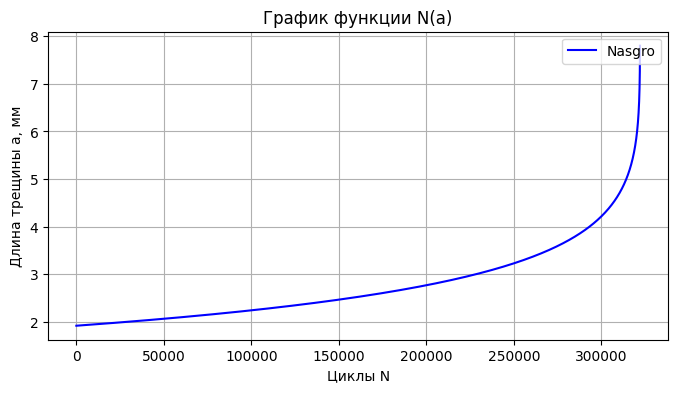

In [154]:
def main():

    # Задайте пределы интегрирования
    a_init = 1.92   # Нижний предел интегрирования
    a_crit = 8  # Верхний предел интегрирования
    step = 0.01
    N_nas = []
    N_par = []
    a = np.arange(a_init, a_crit, step)   
    N_nas.append(0)
    N_par.append(0)


    for a_value in a[1:]:
        if choice_eq == 1:
            N_i_nas, error_nas = integrate.quad(equation, a_init, a_value)
            N_nas.append(N_i_nas)
        elif choice_eq == 2:
            N_i_par, error_par = integrate.quad(equation, a_init, a_value)
            N_par.append(N_i_par)
        elif choice_eq == 3:
            N_i_nas, error_nas = integrate.quad(equation, a_init, a_value)
            N_i_par, error_par = integrate.quad(equation, a_init, a_value)
            N_nas.append(N_i_nas)
            N_par.append(N_i_par)
        

    #  Используйте метод прямоугольников для численного интегрирования
    if choice_eq == 1:
        for a_value, N_value in zip(a, N_nas):
            print(f"For Nasgro a = {a_value:.3f}, N = {N_value:.6f}")
    elif choice_eq == 2:
        for a_value, N_value in zip(a, N_par):
            print(f"For Paris a = {a_value:.3f}, N = {N_value:.6f}")

    # Nasgro figure
    plt.figure(figsize=(8,4))
    if choice_eq == 1:
        plt.plot(N_nas, a, '-b', label = 'Nasgro', color='blue')
        plt.legend(loc='upper right')
    elif choice_eq == 2:
        plt.plot(N_par, a, '-b', label = 'Paris', color='red')
        plt.legend(loc='upper left')
    elif choice_eq == 3:
        plt.plot(N_nas, a, '-b', label = 'Nasgro', color='blue')
        plt.legend(loc='upper right')
        plt.plot(N_par, a, '-b', label = 'Paris', color='red')
        plt.legend(loc='upper left')
    plt.title('График функции N(а)')
    plt.xlabel('Циклы N')
    plt.ylabel('Длина трещины а, мм')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()